## Guide to the Sequential Model

In [1]:
import keras

/Users/wojciechprazuch/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/wojciechprazuch/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/wojciechprazuch/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/wojciechpr

In [2]:
class SimpleMLP(keras.Model):
    
    def __init__(self, use_bn=False, use_dp=False, num_classes=10):
        super(SimpleMLP, self).__init__(name='mlp')
        self.use_bn = use_bn
        self.use_dp = use_dp
        self.num_classes = num_classes
        
        self.dense1 = keras.layers.Dense(32, activation='relu')
        self.dense2 = keras.layers.Dense(num_classes, activation='softmax')
        if self.use_dp:
            self.dp = keras.layers.Dropout(0.5)
        if self.use_bn:
            self.bn = keras.layers.BatchNormalization(axis=-1)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        if self.use_dp:
            x = self.dp(x)
        if self.use_bn:
            x = self.bn(x)
        return self.dense2(x)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [16]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000,1))

one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

model.fit(data, one_hot_labels, epochs=10, batch_size=32)

### Multilayer Perceptron (MLP) for multi-class softmax classification

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [26]:
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [29]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=128)

In [31]:
score = model.evaluate(x_test, y_test, batch_size=128)

100/100 [==============================] - 0s 1ms/step


### MLP for binary classification

In [33]:
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

In [35]:
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=128)

In [37]:
score = model.evaluate(x_test, y_test, batch_size=128)

100/100 [==============================] - 0s 1ms/step


### VGG-like convnet

In [39]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [41]:
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

In [44]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
100/100 [==============================] - 7s 73ms/step - loss: 2.4121
Epoch 2/10
100/100 [==============================] - 5s 49ms/step - loss: 2.2811
Epoch 3/10
100/100 [==============================] - 5s 47ms/step - loss: 2.3162
Epoch 4/10
100/100 [==============================] - 5s 47ms/step - loss: 2.2580
Epoch 5/10
100/100 [==============================] - 5s 48ms/step - loss: 2.2503
Epoch 6/10
100/100 [==============================] - 5s 49ms/step - loss: 2.2457
Epoch 7/10
100/100 [==============================] - 5s 49ms/step - loss: 2.2642
Epoch 8/10
100/100 [==============================] - 5s 47ms/step - loss: 2.2649
Epoch 9/10
100/100 [==============================] - 5s 47ms/step - loss: 2.2560
Epoch 10/10
20/20 [==============================] - 0s 24ms/step


### Sequence classification with LSTM

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

In [ ]:
max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)

### Sequence classification with LSTM

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [ ]:
seq_length = 64

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 100)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

### Stacked LSTM for sequence classification

In [54]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [ ]:
data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
              input_shape=(timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

#Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
         batch_size=64, epochs=5,
         validation_data=(x_val, y_val))

### Same stacked LSTM model, rendered "stateful"

In [59]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
              batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))

model.fit(x_train, y_train,
         batch_size=batch_size, epochs=5, shuffle=False,
         validation_data=(x_val, y_val))

## Guide to the Functional API

### First example: a densely-connected network

In [60]:
from keras.layers import Input, Dense
from keras.models import Model

In [64]:
# This returns a tensor
inputs = Input(shape=(784,))

In [65]:
# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(64, activation='relu')(inputs)
output_2 = Dense(64, activation='relu')(output_1)
predictions = Dense(10, activation='softmax')(output_2)

In [ ]:
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels)

### All models are callable, just like layers

In [68]:
x = Input(shape=(784,))
# This works, and returns the 10-way softmax we defined above
y = model(x)

#### This can allow, for instance, to quickly create models that can process sequences of inputs. You could turn an image classification model into a video classification model, in just one line.

In [69]:
from keras.layers import TimeDistributed

# Input tensor for sequences of 20 timesteps,
# each containing a 784-dimensional vector

input_sequences = Input(shape=(20, 784))

# This applies our previous model to every timestep in the input sequences.
# the output of the previous model was a 10-way softmax,
# so the output of the layer below will be a sequence of 20 vectors of size 10.
processed_sequences = TimeDistributed(model)(input_sequences)

### Multi-input and multi-output models

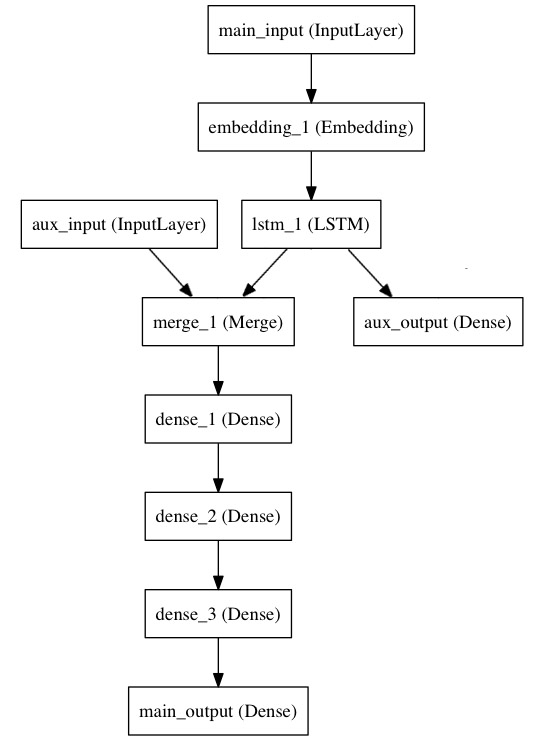

In [3]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
import numpy as np
np.random.seed(0)

# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.

x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence

lstm_out = LSTM(32)(x)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

In [6]:
auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [7]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

In [ ]:
headline_data = np.round(np.abs(np.random.rand(12, 100) * 100))
additional_data = np.random.randn(12, 5)
headline_labels = np.random.randn(12, 1)
additional_labels = np.random.randn(12, 1)
model.fit([headline_data, additional_data], [headline_labels, additional_labels],
          epochs=50, batch_size=32)

In [ ]:
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

# And trained it via:
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': headline_labels, 'aux_output': additional_labels},
          epochs=50, batch_size=32)

### Shared layers

In [12]:
import keras
from keras.layers import Input, Dense, LSTM
from keras.models import Model

In [13]:
tweet_a = Input(shape=(280, 256))
tweet_b = Input(shape=(280, 256))

In [16]:
# This layer can take as input a matrix
# and will return a vector of size 64
shared_lstm = LSTM(64)

# When we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoding_a = shared_lstm(tweet_a)
encoding_b = shared_lstm(tweet_b)

In [17]:
merged_vector = keras.layers.concatenate([encoding_a, encoding_b], axis=-1)

In [18]:
predictions = Dense(1, activation='sigmoid')(merged_vector)

model = Model(inputs=[tweet_a, tweet_b], outputs=[predictions])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit([data_a, data_b], labels, epochs=10)

### Inception module

In [26]:
from keras.layers import Conv2D, MaxPooling2D, Input

input_img = Input(shape=(256, 256, 3))

tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)

### Residual connection on a convolutional layer

In [28]:
from keras.layers import Input, Conv2D

input_img = Input(shape=(256, 256, 3))

y = Conv2D(3, (3, 3), padding='same')(input_img)
z = keras.layers.add([input_img, y])

### Shared vision model